In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from matplotlib import animation, colors
# from sklearn.metrics import accuracy_score #scoring
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import MinMaxScaler #normalisation
# from sklearn.model_selection import train_test_split

## Dataset

In [13]:
# banknote authentication Data Set
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication
# Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
# Irvine, CA: University of California, School of Information and Computer Science.

data_file = f'D:\work\data\data_banknote_authentication.txt'
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0,4) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,),dtype=np.int64)

In [17]:
data_x.shape

(1372, 4)

In [16]:
data_y.shape

(1372,)

## Self-Organized Map (SOM)

In [5]:
from sklearn_som.som import SOM

In [18]:
# Build a 2x1 SOM (2 clusters)
iris_som = SOM(m=2, n=1, dim=4)
# Fit it to the data
iris_som.fit(data_x)

In [20]:
# Assign each datapoint to its predicted cluster
predictions = iris_som.predict(data_x)

In [21]:
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

## Visualize

In [26]:
from matplotlib.colors import ListedColormap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


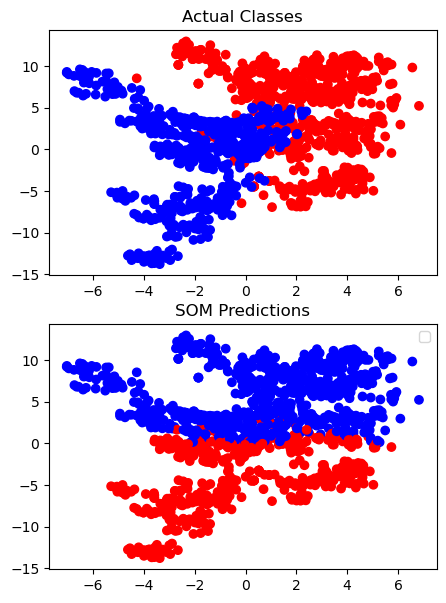

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
# Extract just two features (just for ease of visualization)
x = data_x[:,0]
y = data_x[:,1]
colors = ['red', 'blue']

ax[0].scatter(x, y, c=data_y, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')

plt.legend(loc = 'best')
plt.show()

## sklearn-som v. 1.1.0 Master Documentation

class sklearn_som.som.SOM(m=3, n=3, dim=3, lr=1, sigma=1, max_iter=3000, **kwargs)
The 2-D, rectangular grid self-organizing map class using Numpy

### Parameters


m : int, default=3
    The shape along dimension 0 (vertical) of the SOM.

n : int, default=3
    The shape along dimesnion 1 (horizontal) of the SOM.

dim : int, default=3
    The dimensionality (number of features) of the input space.

lr : float, default=1
    The initial step size for updating the SOM weights.

sigma : float, optional
    Optional parameter for magnitude of change to each weight. Does not update over training (as does learning rate). Higher values mean more aggressive updates to weights.

max_iter : int, optional
    Optional parameter to stop training if you reach this many interation.

random_state : int, optional
    Optional integer seed to the random number generator for weight initialization. This will be used to create a new instance of Numpy’s default random number generator (it will not call np.random.seed()). Specify an integer for deterministic results.

### Methods

fit(X, epochs=1, shuffle=True)
Fit the self organizing-map to the given data.

    Parameters

    X : ndarray
    Training data. Must have shape (n, self.dim) where n is the number of training samples.

    epochs : int, default=1
    The number of times to loop through the training data when fitting.

    shuffle : bool, default True
    Whether or not to randomize the order of train data when fitting. Can be seeded with np.random.seed() prior to calling fit.


    Returns

    None
    Fits the SOM to the given data but does not return anything.
    
predict(X)
    Predict cluster for each element in X.

    Parameters

    X : ndarray
    An ndarray of shape (n, self.dim) where n is the number of samples. The data to predict clusters for.


    Returns

    labels : ndarray
    An ndarray of shape (n,). The predicted cluster index for each item in X.

transform(X)
    Transform the data X into cluster distance space.

    Parameters

    X : ndarray
    Data of shape (n, self.dim) where n is the number of samples. The data to transform.


    Returns

    transformed : ndarray
    Transformed data of shape (n, self.n*self.m). The Euclidean distance from each item in X to each cluster center.


fit_predict(X, **kwargs)
    Convenience method for calling fit(X) followed by predict(X).

    Parameters

    X : ndarray
    Data of shape (n, self.dim). The data to fit and then predict.

    **kwargs
    Optional keyword arguments for the .fit() method.


    Returns

    labels : ndarray
    ndarray of shape (n,). The index of the predicted cluster for each item in X (after fitting the SOM to the data in X).
    
    
fit_transform(X, **kwargs)
    Convenience method for calling fit(X) followed by transform(X).

    Unlike in sklearn, this is not implemented more efficiently (the efficiency is the same as calling fit(X) directly followed by transform(X)).


    Parameters

    X : ndarray
    Data of shape (n, self.dim) where n is the number of samples.

    **kwargs
    Optional keyword arguments for the .fit() method.


    Returns

    transformed : ndarray
    ndarray of shape (n, self.m*self.n). The Euclidean distance from each item in X to each cluster center.